In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import SilhouetteVisualizer

In [3]:
# Load the Wine Quality dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
wine_data = pd.read_csv(url, sep=';')
wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [13]:
cleaned = wine_data.replace('?', np.nan)
#Remove rows with any missing values
cleaned = cleaned.dropna()
#Print the dimensions of the cleaned dataset
print(cleaned.shape)
cleaned.describe()

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
#Get rows and columns
wine_data.shape

(1599, 12)

In [5]:
# Explore the dataset
print(wine_data.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [6]:
#Define column names
wine_data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [7]:
#show if any null value exist in dataframe
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

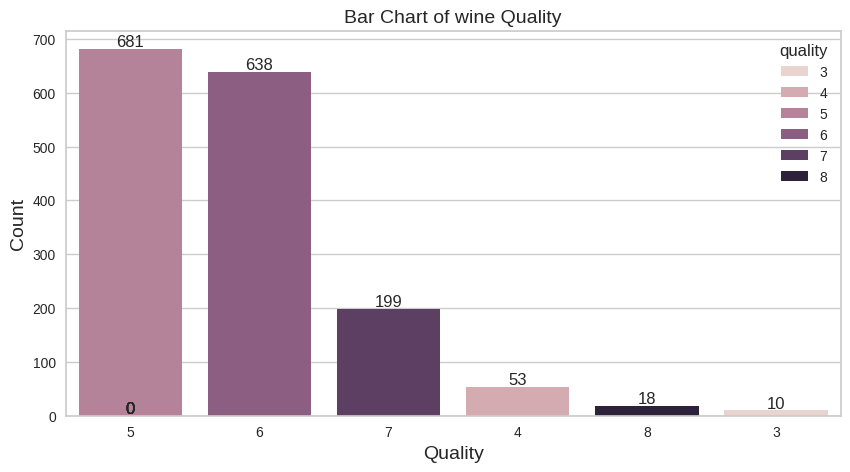

In [15]:

#Plot the bar graph
def bar_plot(dataframe, x_variable):

    # Create a figure and axis object
    plt.figure(figsize=(10, 5))


    # Create the count plot
    ax = sns.countplot(x=x_variable, hue='quality', data=dataframe, order=dataframe[x_variable].value_counts().index)

    # Add annotations to the bars
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 5),
                    textcoords='offset points')

    # Set labels and title
    plt.xlabel(x_variable.capitalize(), fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.title('Bar Chart of wine Quality', fontsize=14)

    # Show the plot
    plt.show()
bar_plot(cleaned, 'quality')


In [16]:
# Data preprocessing
X = wine_data.drop('quality', axis=1)  # Features
y = wine_data['quality']  # Target variable

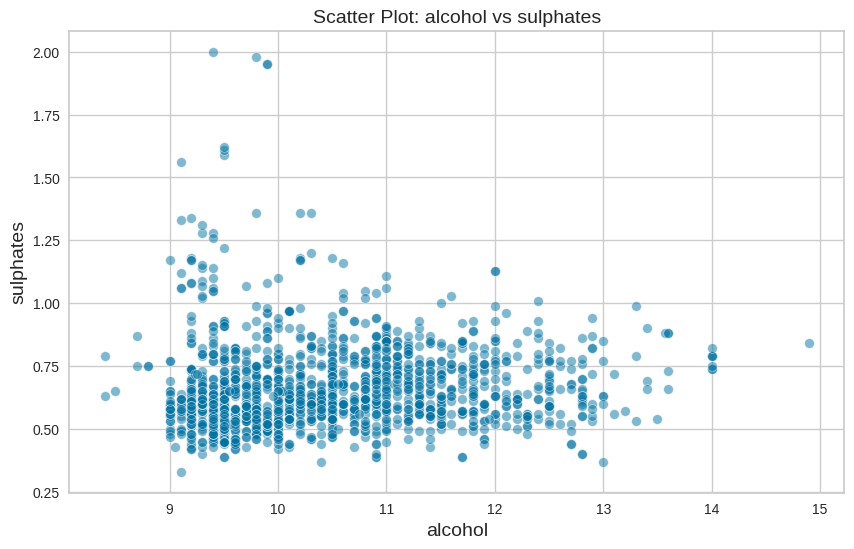

In [17]:
#plot the scatter plot for alcohol vs sulphates
def scatterplot(dataframe, x, y):

    # creating the figure size.
    plt.figure(figsize=(10, 6))

    # Create the scatter plot
    sns.scatterplot(x=x, y=y, data=dataframe, alpha=0.5)

    # Set the both labels and title
    plt.xlabel(x, fontsize=14)
    plt.ylabel(y, fontsize=14)
    plt.title(f'Scatter Plot: {x} vs {y}', fontsize=14)

    # Show the plot
    plt.show()

# function calling
scatterplot(wine_data, 'alcohol', 'sulphates')


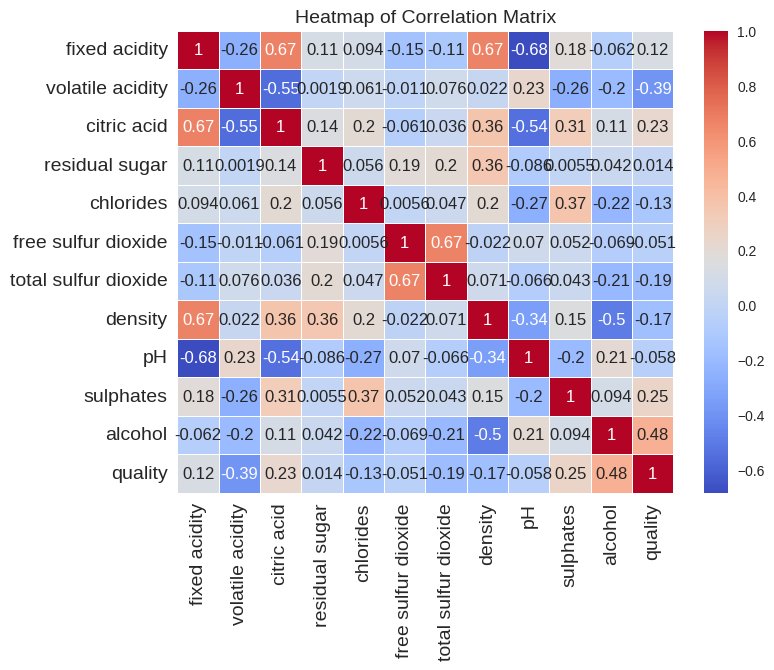

In [19]:
#plot the correlation heat map
def plotting_heatmap(correlation_matrix):
    # Check if the correlation matrix is empty or has a size of zero
    if correlation_matrix.empty or correlation_matrix.size == 0:
        print("Correlation matrix is empty or has a size of zero.")
        return

    # Size of the figure
    plt.figure(figsize=(8, 6))

    # Generating the heatmap from the correlation matrix
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2g', linecolor='white')

    # Creating a title for the plot
    plt.title('Heatmap of Correlation Matrix', fontsize=14)

    # Adding the x and y ticks for the plot
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

    # Show the plot
    plt.show()

# Call the function
plotting_heatmap(wine_data.corr())


In [ ]:
# Perform k-means clustering with explicit n_init value
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)  # Set n_init to 10 or any desired value
kmeans.fit(X)
wine_data['Cluster'] = kmeans.labels_

<ipython-input-20-45565c7fcd8b>:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k-', lw=2, color='red')


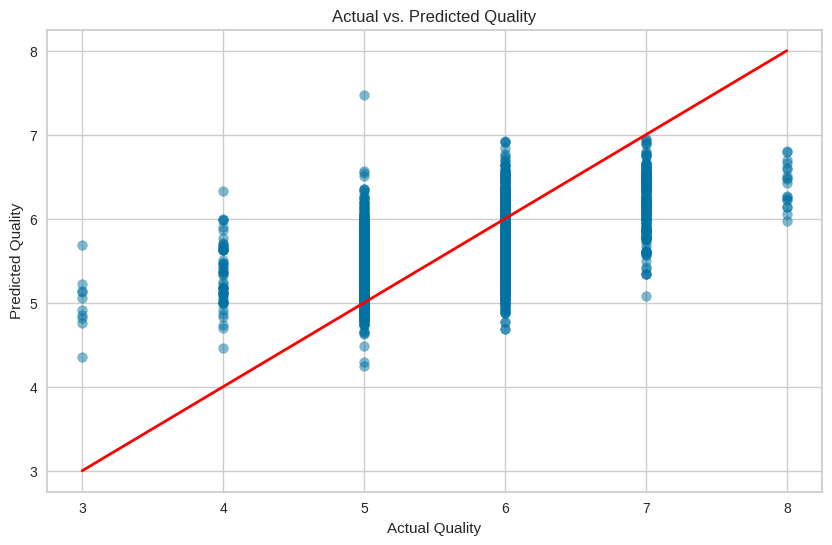

In [20]:
from sklearn.linear_model import LinearRegression
#plot the line regression for actual vs predicted quality
def plot_regression_line(X, y):
    # Fitting linear regression model
    model = LinearRegression()
    model.fit(X, y)

    # Plotting the regression line
    plt.figure(figsize=(10, 6))

    # Plotting actual data points
    plt.scatter(y, model.predict(X), alpha=0.5)

    # Plotting the regression line
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k-', lw=2, color='red')

    plt.xlabel('Actual Quality')
    plt.ylabel('Predicted Quality')
    plt.title('Actual vs. Predicted Quality')

    plt.show()

# Assuming your data is stored in a DataFrame named 'wine_data'
# Extracting the independent variable (X) and dependent variable (y)
X = wine_data.drop(columns=['quality'])  # Features
y = wine_data['quality']  # Target variable

# Call the function
plot_regression_line(X, y)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


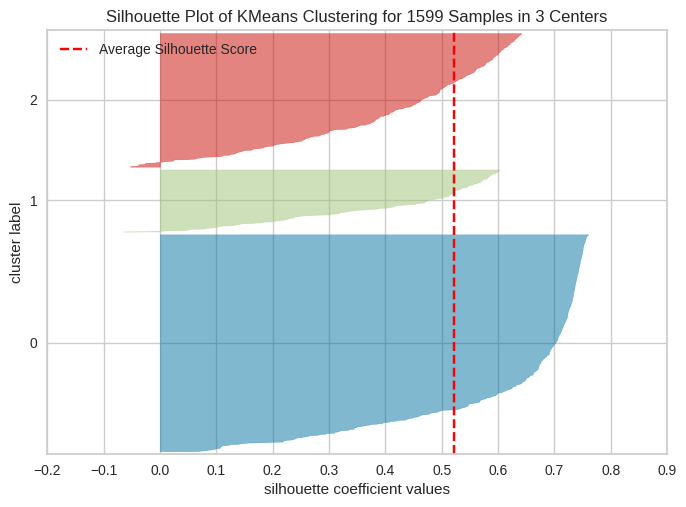

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


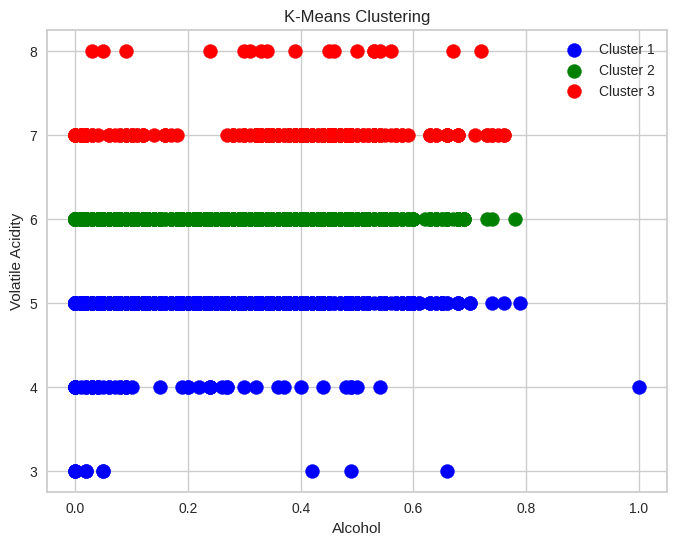

In [ ]:
# Perform k-means clustering with explicit n_init value
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)  # Set n_init to 10 or any desired value
kmeans.fit(X)
wine_data['Cluster'] = kmeans.labels_

# Plot Silhouette Plot for K-means clustering
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(X)
visualizer.show()


#to create future matrix
x=wine_data.iloc[:,[2,11]].values


# Plot K-means Clustering (scatter plot)
kmeans = KMeans(n_clusters=3,init='k-means++',random_state=0)
y_kmeans=kmeans.fit_predict(x)

plt.figure(figsize=(8, 6))
plt.scatter(x[y_kmeans==0,0], x[y_kmeans==0,1],  c='blue',s=100,label='Cluster 1')
plt.scatter(x[y_kmeans==1,0], x[y_kmeans==1,1],  c='green',s=100,label='Cluster 2')
plt.scatter(x[y_kmeans==2,0], x[y_kmeans==2,1],  c='red',s=100,label='Cluster 3')
plt.xlabel('Alcohol')
plt.ylabel('Volatile Acidity')
plt.legend()
plt.title('K-Means Clustering')
plt.show()




In [ ]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Cluster
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023,0.798624
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569,0.899575
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000,0.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000,2.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,2.000000


In [ ]:
def mean_for_columns():

  """
    Calculating mean of the columns, using loop.
    Mean(): pre-defined module, imported from Statistics library.

  """
  for i in all_columns:
    mean_value = wine_data[i].mean()
    print("Mean of", i, ":", mean_value)

all_columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']
mean_for_columns()



Mean of fixed acidity : 8.31963727329581
Mean of volatile acidity : 0.5278205128205128
Mean of citric acid : 0.2709756097560976
Mean of residual sugar : 2.53880550343965
Mean of chlorides : 0.08746654158849279
Mean of free sulfur dioxide : 15.874921826141339
Mean of total sulfur dioxide : 46.46779237023139
Mean of density : 0.9967466791744841
Mean of pH : 3.3111131957473416
Mean of sulphates : 0.6581488430268917
Mean of alcohol : 10.422983114446529
Mean of quality : 5.6360225140712945


In [ ]:
def median_for_columns():

  """
    Calculating median of the columns, using loop.
    median(): pre-defined module, imported from Statistics library.

  """
  for i in all_columns:
    median_value = wine_data[i].median()
    print("median of", i, ":", median_value)

all_columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']
median_for_columns()

median of fixed acidity : 7.9
median of volatile acidity : 0.52
median of citric acid : 0.26
median of residual sugar : 2.2
median of chlorides : 0.079
median of free sulfur dioxide : 14.0
median of total sulfur dioxide : 38.0
median of density : 0.99675
median of pH : 3.31
median of sulphates : 0.62
median of alcohol : 10.2
median of quality : 6.0


In [ ]:
def standard_deviation_for_columns():

  """
    Calculating standard deviation of the columns, using loop.
    standard_deviation(): pre-defined module, imported from Statistics library.

  """
  for i in all_columns:
    standard_deviation_value = wine_data[i].std()
    print("Standard Deviation of", i, ":", standard_deviation_value)

all_columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']
standard_deviation_for_columns()

Standard Deviation of fixed acidity : 1.7410963181276953
Standard Deviation of volatile acidity : 0.17905970415353537
Standard Deviation of citric acid : 0.19480113740531857
Standard Deviation of residual sugar : 1.4099280595072798
Standard Deviation of chlorides : 0.0470653020100901
Standard Deviation of free sulfur dioxide : 10.460156969809725
Standard Deviation of total sulfur dioxide : 32.895324478299074
Standard Deviation of density : 0.0018873339538425554
Standard Deviation of pH : 0.15438646490354277
Standard Deviation of sulphates : 0.16950697959010996
Standard Deviation of alcohol : 1.0656675818473946
Standard Deviation of quality : 0.807569439734705


In [ ]:
def skewness_for_columns():

  """
    Calculating skewness of the columns, using loop.
    skew(): pre-defined module, imported from Statistics library.

  """
  for i in all_columns:
    skewness_value = wine_data[i].skew()
    print("skewness of", i, ":", skewness_value)

all_columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']
skewness_for_columns()

skewness of fixed acidity : 0.9827514413284587
skewness of volatile acidity : 0.6715925723840199
skewness of citric acid : 0.3183372952546368
skewness of residual sugar : 4.54065542590319
skewness of chlorides : 5.680346571971724
skewness of free sulfur dioxide : 1.250567293314441
skewness of total sulfur dioxide : 1.515531257594554
skewness of density : 0.07128766294927483
skewness of pH : 0.19368349811284427
skewness of sulphates : 2.4286723536602945
skewness of alcohol : 0.8608288068888538
skewness of quality : 0.21780157547366327


In [ ]:
def kurtosis_for_columns():

  """
    Calculating kurtosis of the columns, using loop.
    kurtosis(): pre-defined module, imported from Statistics library.

  """
  for i in all_columns:
    kurtosis_value = wine_data[i].kurtosis()
    print("kurtosis of", i, ":", kurtosis_value)

all_columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']
kurtosis_for_columns()

kurtosis of fixed acidity : 1.1321433977276252
kurtosis of volatile acidity : 1.2255422501791422
kurtosis of citric acid : -0.7889975153633966
kurtosis of residual sugar : 28.617595424475443
kurtosis of chlorides : 41.71578724757661
kurtosis of free sulfur dioxide : 2.023562045840575
kurtosis of total sulfur dioxide : 3.8098244878645744
kurtosis of density : 0.9340790654648123
kurtosis of pH : 0.806942508246574
kurtosis of sulphates : 11.720250727147674
kurtosis of alcohol : 0.2000293113417695
kurtosis of quality : 0.2967081197538759
